# 1_0-process-melspec.ipynb

**Input** Preprocessed data in .csv format

**Output** Images in sorted into categorical directories (melspectogram diagrams in .png format)





---


# Library Imports

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import librosa
from librosa import display

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras import utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Read in Data

In [0]:
# read data
df = pd.read_csv('/content/drive/My Drive/CAPSTONE/data/144_songs_5_chops_10_seconds.csv')
df = df.drop(columns=['Unnamed: 0'])


In [0]:
df['id'] = df.index
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15965,15966,15967,15968,15969,15970,15971,15972,15973,15974,15975,15976,15977,15978,15979,15980,15981,15982,15983,15984,15985,15986,15987,15988,15989,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999,song,sampling_rate,composer,era,id
0,0.010144,-0.002373,-0.011255,0.002361,0.010039,-0.005855,-0.009574,0.004170,0.007680,-0.006667,-0.009254,0.007527,0.006561,-0.005840,-0.007732,0.002389,0.004694,0.001804,-0.006422,-0.002607,0.010894,0.001637,-0.012047,-0.000822,0.017405,-0.000102,-0.015926,0.002885,0.014279,-0.002331,-0.013267,0.005885,0.009268,-0.005288,-0.009069,0.003621,0.010689,0.001829,-0.006878,-0.005124,...,-0.062226,0.002816,-0.053921,-0.162502,-0.030027,0.054357,-0.012145,0.003786,0.035735,0.057227,0.080397,0.054716,0.004711,-0.073535,0.020409,0.069952,-0.092901,-0.039761,0.054483,0.033026,-0.000491,-0.038715,0.068917,0.073886,-0.127014,-0.080409,0.057327,0.036096,-0.079362,-0.131480,0.091340,0.076433,-0.142861,-0.014638,0.148945,/content/drive/My Drive/CAPSTONE/raw_data/Cori...,1600,beethoven,romantic,0
1,0.000169,0.000112,-0.000411,-0.000937,-0.000995,-0.000674,-0.000597,-0.000660,-0.000345,-0.000680,-0.001003,-0.000787,-0.000617,-0.000408,-0.000344,0.000217,0.000463,0.000520,0.000007,-0.000494,-0.000942,-0.000943,-0.001286,-0.001498,-0.001289,-0.001475,-0.001034,-0.000768,-0.000862,-0.000864,-0.000349,-0.000218,-0.000008,0.000257,-0.000013,-0.000708,-0.000887,-0.000389,-0.000033,-0.000060,...,0.001451,-0.001340,-0.005416,0.000113,0.003643,-0.000676,-0.001764,0.002444,0.004164,0.004480,0.002476,-0.001756,0.001139,-0.002454,-0.009652,-0.004452,-0.000342,-0.002342,-0.000913,0.007177,0.005544,0.003001,0.001843,-0.004532,-0.001011,-0.001994,-0.007563,-0.003268,0.005572,0.001378,-0.006237,0.003657,0.007704,0.002286,0.000295,/content/drive/My Drive/CAPSTONE/raw_data/Cori...,1600,beethoven,romantic,1
2,-0.016441,-0.118485,-0.081878,0.032908,0.096486,0.071728,0.144098,0.003912,0.028324,-0.034324,-0.060440,0.083810,-0.154382,-0.008051,0.020869,-0.043743,0.114806,-0.020290,-0.018816,0.006240,-0.037961,-0.042054,-0.042590,0.087067,0.095200,-0.039762,0.028797,0.080099,-0.003256,0.040574,-0.125375,-0.063150,-0.047000,-0.100309,0.047424,-0.118737,0.027029,-0.033445,0.018031,0.240478,...,-0.020089,0.007237,0.025398,0.009765,0.007182,0.002166,0.006018,-0.012240,-0.032322,-0.028695,-0.024163,0.009192,0.011105,-0.001933,0.021445,0.027907,0.005731,0.004616,0.007807,-0.011659,0.006993,0.014056,0.014190,0.016105,-0.003654,-0.005735,-0.008912,-0.022737,-0.033340,-0.025150,-0.000203,0.017404,-0.001102,0.009904,0.027184,/content/drive/My Drive/CAPSTONE/raw_data/Cori...,1600,beethoven,romantic,2
3,0.000934,0.000221,-0.000765,-0.001631,-0.002017,-0.001538,-0.000910,-0.000653,-0.000611,-0.000130,0.000909,0.001604,0.001045,0.000940,0.000905,0.000694,0.001473,0.001165,-0.000033,-0.000092,0.000209,-0.000344,-0.000251,-0.000101,-0.000197,0.000183,0.000265,0.000142,0.000367,0.001112,0.001095,0.001530,0.002326,0.001909,0.001014,0.000466,-0.000045,-0.000341,-0.000542,-0.001169,...,-0.009337,-0.000065,0.005487,0.001240,-0.005795,-0.003828,0.003267,0.000951,-0.000656,0.002728,0.001253,0.002807,0.003521,-0.000016,0.004853,0.004380,-0.005628,-0.008578,-0.003490,0.002598,-0.002305,-0.011565,-0.002488,0.006445,-0.001930,-0.004819,0.000755,0.004690,-0.003082,-0.007897,0.004210,0.009642,-0.002316,-0.006464,0.001864,/content/drive/My Drive/CAPSTONE/raw_data/Cori...,1600,beethoven,romantic,3
4,-0.008117,0.006405,-0.004509,-0.000858,0.025242,-0.007246,-0.026675,0.009932,-0.004857,0.002254,0.031695,-0.020229,-0.031043,0.027371,0.012395,-0.019243,0.015962,-0.009208,-0.031576,0.028319,0.016008,-0.031295,0.013738,0.023924,-0.029677,-0.010917,0.022131,-0.023885,0.005007,0.042729,-0.030861,-0.033246,0.032160,0.003281,-0.010107,0.024856,-0.020432,-0.029951,0.029290,0.008552,...,0.006958,-0.023028,0.017341,-0.003280,0.000010,0.009373,-0.027255,0.

# file paths and hard codes

In [0]:
img_data_path = '/content/drive/My Drive/CAPSTONE/img_data/'


# convert to mel-spec pngs

In [0]:
for i in range(df.shape[0]):
  y = df.iloc[i][:-5]
  y = np.array(y)
  y = y.astype(float)
  
  label = df.iloc[i][-2]
  
  id = df.iloc[i][-1]

  img_name = '/img_' + str(id) + '_' +label

  D = np.abs(librosa.stft(y))**2
  S = librosa.feature.melspectrogram(S=D)

  plt.figure(figsize=(10,4))
  librosa.display.specshow(librosa.power_to_db(S,
                                             ref=np.max),
                         fmax=1000)
  plt.plot()
  plt.savefig(img_data_path + label + img_name);

  print('Image processed: ' + str(i))

# Extra

In [0]:
y = df.iloc[1][:-5]
y = np.array(y)
y = y.astype(float)

label = df.iloc[1][-2]

id = df.iloc[1][-1]

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

df_mel = pd.DataFrame(S)
df_mel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.859655e-04,0.001175,0.002057,0.001466,0.003347,0.005095,0.005152,0.008970,0.002719,0.003070,0.004163,0.003725,0.023097,0.031367,0.010141,0.001049,3.524109e-04,3.159215e-03,1.134462e-02,8.071538e-03,0.001707,0.000705,0.000358,0.001092,0.001332,0.000755,0.001470,0.002785,0.007547,0.007608,0.002043,0.002838
1,1.930397e-03,0.001230,0.001115,0.000484,0.000460,0.001630,0.002164,0.007644,0.003895,0.002482,0.002327,0.002829,0.016440,0.013699,0.002683,0.001625,1.531568e-03,2.420201e-03,2.722560e-03,5.822515e-03,0.002334,0.000594,0.000803,0.001664,0.001191,0.001537,0.000808,0.001200,0.005546,0.006336,0.001004,0.001177
2,3.315504e-04,0.000823,0.002305,0.002293,0.001443,0.000629,0.000337,0.001792,0.002705,0.003625,0.003541,0.004067,0.026154,0.019306,0.002444,0.002371,2.363567e-03,9.098606e-04,7.804108e-04,9.766348e-04,0.000236,0.000484,0.000712,0.000658,0.000615,0.000689,0.000594,0.001344,0.004862,0.003219,0.000708,0.000286
3,1.123123e-04,0.000375,0.000488,0.000287,0.000348,0.000098,0.000204,0.000251,0.000342,0.000389,0.000905,0.001709,0.005103,0.002206,0.000291,0.000193,2.850297e-04,3.808422e-05,5.983551e-05,8.696958e-05,0.000104,0.000345,0.000414,0.000207,0.000189,0.000071,0.000206,0.000711,0.001901,0.000653,0.000243,0.000083
4,7.387199e-04,0.000390,0.000244,0.000414,0.000320,0.000361,0.000341,0.000212,0.000213,0.000725,0.000557,0.002719,0.006818,0.003104,0.001747,0.001185,1.363641e-03,1.081708e-03,8.351150e-04,1.413934e-03,0.001040,0.000346,0.001251,0.002407,0.001562,0.000702,0.000663,0.000698,0.000767,0.001308,0.000285,0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,3.377487e-06,0.000745,0.002208,0.000830,0.000521,0.000336,0.000706,0.001025,0.000815,0.000583,0.000401,0.002642,0.023322,0.470355,0.571500,0.055382,3.931735e-03,6.701807e-04,1.176331e-04,1.595723e-05,0.000128,0.002864,0.004567,0.003873,0.001067,0.000369,0.053572,0.230412,0.129235,0.023336,0.001586,0.000172
124,3.339556e-06,0.000587,0.002155,0.002278,0.002044,0.001171,0.001598,0.002116,0.000953,0.000589,0.000991,0.013912,0.056783,0.242072,0.334809,0.051785,2.355978e-03,1.236685e-04,2.327329e-05,6.950916e-06,0.000137,0.003923,0.006717,0.004075,0.001162,0.000910,0.057523,0.103928,0.029953,0.007236,0.000349,0.000035
125,1.342089e-06,0.000268,0.001275,0.001059,0.000576,0.000322,0.000843,0.001910,0.001048,0.000595,0.000944,0.140843,0.531292,0.184309,0.026020,0.001698,2.334035e-04,7.178182e-05,1.276492e-05,4.902868e-06,0.000104,0.002529,0.006869,0.012037,0.004345,0.000432,0.004298,0.007529,0.004292,0.001951,0.000164,0.000014
126,1.155850e-06,0.000297,0.001052,0.000441,0.000200,0.000211,0.000514,0.001205,0.000694,0.000265,0.000230,0.040593,0.124725,0.032081,0.002446,0.000182,1.672563e-05,3.152998e-06,4.785669e-07,2.338778e-07,0.000049,0.001962,0.005150,0.010053,0.003721,0.000193,0.000463,0.001012,0.000842,0.000348,0.000024,0.000005


In [0]:
df_mels = pd.DataFrame()
for i in range(df.shape[0]):
  y = df.iloc[i][:-5]
  y = np.array(y)
  y = y.astype(float)
  
  label = df.iloc[i][-2]
  
  id = df.iloc[i][-1]

  D = np.abs(librosa.stft(y))**2
  S = librosa.feature.melspectrogram(S=D)
  
  df_mel = pd.DataFrame(S)
  
  df_mels = df_mels.append() 
  print(S)

  print('Image processed: ' + str(i))

Streaming output truncated to the last 5000 lines.
Image processed: 317
[[5.85965460e-04 1.17529827e-03 2.05721818e-03 ... 7.60842040e-03
  2.04266570e-03 2.83796631e-03]
 [1.93039737e-03 1.23039498e-03 1.11471476e-03 ... 6.33585101e-03
  1.00441655e-03 1.17690036e-03]
 [3.31550436e-04 8.22614545e-04 2.30525903e-03 ... 3.21867714e-03
  7.07970992e-04 2.86128984e-04]
 ...
 [1.34208913e-06 2.68460680e-04 1.27482504e-03 ... 1.95092476e-03
  1.63565638e-04 1.37390739e-05]
 [1.15585049e-06 2.96705754e-04 1.05178547e-03 ... 3.47969585e-04
  2.36405896e-05 5.44823590e-06]
 [1.40548475e-07 3.78471984e-05 2.38509062e-04 ... 6.83509216e-05
  3.58034067e-06 1.18503814e-06]]
Image processed: 318
[[5.85965460e-04 1.17529827e-03 2.05721818e-03 ... 7.60842040e-03
  2.04266570e-03 2.83796631e-03]
 [1.93039737e-03 1.23039498e-03 1.11471476e-03 ... 6.33585101e-03
  1.00441655e-03 1.17690036e-03]
 [3.31550436e-04 8.22614545e-04 2.30525903e-03 ... 3.21867714e-03
  7.07970992e-04 2.86128984e-04]
 ...
 [1.3

In [0]:

X = df.drop(columns=['song','sampling_rate','composer','era'])
y = df['era']
y = y.replace({'baroque':0, 'classical':1,'romantic':2, 'modern':3})
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.1,
                                                  stratify=y_train,
                                                  random_state=42)

In [0]:
n_samples = X_train.shape[0]
n_samples

546

In [0]:
n_features = X_train.shape[1]
n_features

16000

In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(16000,), activation='relu'))
model.add(Dense(4, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=10,
                    batch_size=512)

Epoch 1/10
2/2 [==============================] - 0s 150ms/step - loss: 1.3956 - accuracy: 0.2161 - val_loss: 1.3907 - val_accuracy: 0.2459
Epoch 2/10
2/2 [==============================] - 0s 75ms/step - loss: 1.2592 - accuracy: 0.7363 - val_loss: 1.3851 - val_accuracy: 0.2459
Epoch 3/10
2/2 [==============================] - 0s 77ms/step - loss: 1.1927 - accuracy: 0.9084 - val_loss: 1.3797 - val_accuracy: 0.3115
Epoch 4/10
2/2 [==============================] - 0s 81ms/step - loss: 1.1366 - accuracy: 0.9505 - val_loss: 1.3743 - val_accuracy: 0.3443
Epoch 5/10
2/2 [==============================] - 0s 78ms/step - loss: 1.0850 - accuracy: 0.9615 - val_loss: 1.3695 - val_accuracy: 0.3279
Epoch 6/10
2/2 [==============================] - 0s 77ms/step - loss: 1.0366 - accuracy: 0.9707 - val_loss: 1.3654 - val_accuracy: 0.3770
Epoch 7/10
2/2 [==============================] - 0s 86ms/step - loss: 0.9898 - accuracy: 0.9744 - val_loss: 1.3618 - val_accuracy: 0.3770
Epoch 8/10
2/2 [==========

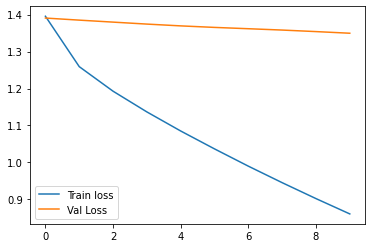

In [0]:

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();